TASK 8 : Clustering with K-Means

In [12]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [13]:
#Loading the dataset
data = pd.read_csv('Mall_Customers.csv')
print(data.head())
print(data.info())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [14]:
#Features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

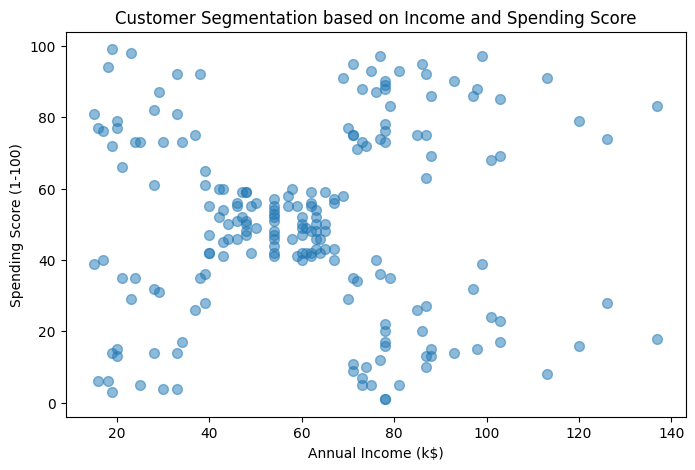

In [15]:
#Visualizing the data
plt.figure(figsize=(8, 5))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], s=50, alpha=0.5)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation based on Income and Spending Score')
plt.show()

In [16]:
#Using the Elbow Method to find the optimal number of clusters
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

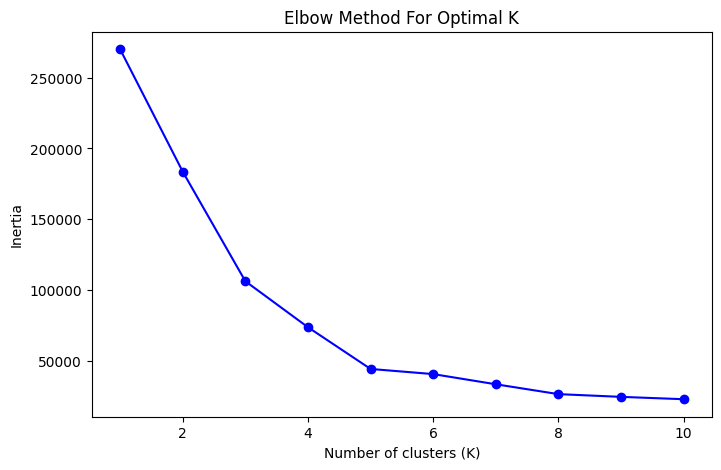

In [17]:


plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()


From the above diagram we see that the optimal number of clusters is 5. Now we can create and fit the K-Means model with this number.

In [18]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

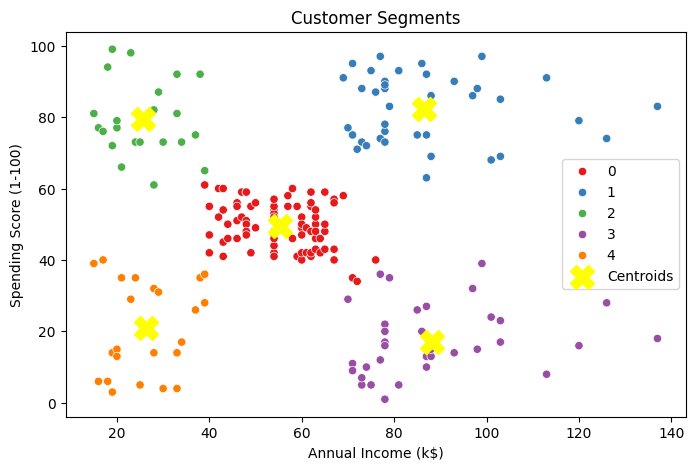

In [19]:
#Visualizing the Clusters
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Annual Income (k$)', y='Spending Score (1-100)',
    hue='Cluster', palette='Set1', data=data, legend='full'
)
plt.scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
    s=300, c='yellow', label='Centroids', marker='X'
)
plt.title('Customer Segments')
plt.legend()
plt.show()


In [20]:
#Evaluting Clusters using Silhouette Score
from sklearn.metrics import silhouette_score
score = silhouette_score(X, data['Cluster'])
print(f'Silhouette Score: {score:.2f}')


Silhouette Score: 0.55
